In [1]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from deeplearning.classifiers.cnn import *
from deeplearning.data_utils import get_CIFAR10_data
from deeplearning.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from deeplearning.layers import *
from deeplearning.fast_layers import *
from deeplearning.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()

In [9]:
# Train a really good model on CIFAR-10
from deeplearning.classifiers.convnet4 import *
model = HaoConvNet4(weight_scale=0.006, hidden_dim=512, reg=0.001, dropout=0.5)

solver = Solver(model, data,
                num_epochs= 15, batch_size=128,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=10)
solver.train()

(Iteration 1 / 5730) loss: 2.312790
(Epoch 0 / 15) train acc: 0.122000; val_acc: 0.105000
(Iteration 11 / 5730) loss: 2.064127
(Iteration 21 / 5730) loss: 1.948791
(Iteration 31 / 5730) loss: 1.831199
(Iteration 41 / 5730) loss: 1.831868
(Iteration 51 / 5730) loss: 1.832328
(Iteration 61 / 5730) loss: 1.721497
(Iteration 71 / 5730) loss: 1.654223
(Iteration 81 / 5730) loss: 1.786488
(Iteration 91 / 5730) loss: 1.642036
(Iteration 101 / 5730) loss: 1.601469
(Iteration 111 / 5730) loss: 1.703617
(Iteration 121 / 5730) loss: 1.836693
(Iteration 131 / 5730) loss: 1.752310
(Iteration 141 / 5730) loss: 1.530131
(Iteration 151 / 5730) loss: 1.549214
(Iteration 161 / 5730) loss: 1.608141
(Iteration 171 / 5730) loss: 1.610027
(Iteration 181 / 5730) loss: 1.724870
(Iteration 191 / 5730) loss: 1.538923
(Iteration 201 / 5730) loss: 1.465707
(Iteration 211 / 5730) loss: 1.631055
(Iteration 221 / 5730) loss: 1.641495
(Iteration 231 / 5730) loss: 1.532925
(Iteration 241 / 5730) loss: 1.642657
(Iterat

(Iteration 2001 / 5730) loss: 1.232538
(Iteration 2011 / 5730) loss: 1.374378
(Iteration 2021 / 5730) loss: 1.180449
(Iteration 2031 / 5730) loss: 1.206899
(Iteration 2041 / 5730) loss: 1.224657
(Iteration 2051 / 5730) loss: 1.258392
(Iteration 2061 / 5730) loss: 1.230631
(Iteration 2071 / 5730) loss: 1.477694
(Iteration 2081 / 5730) loss: 1.319514
(Iteration 2091 / 5730) loss: 1.365424
(Iteration 2101 / 5730) loss: 1.368626
(Iteration 2111 / 5730) loss: 1.419773
(Iteration 2121 / 5730) loss: 1.162186
(Iteration 2131 / 5730) loss: 1.195887
(Iteration 2141 / 5730) loss: 1.204060
(Iteration 2151 / 5730) loss: 1.180522
(Iteration 2161 / 5730) loss: 1.174265
(Iteration 2171 / 5730) loss: 1.226392
(Iteration 2181 / 5730) loss: 1.277490
(Iteration 2191 / 5730) loss: 1.137827
(Iteration 2201 / 5730) loss: 1.143168
(Iteration 2211 / 5730) loss: 1.276833
(Iteration 2221 / 5730) loss: 1.220161
(Iteration 2231 / 5730) loss: 1.225598
(Iteration 2241 / 5730) loss: 1.131594
(Iteration 2251 / 5730) l

(Iteration 3981 / 5730) loss: 1.295908
(Iteration 3991 / 5730) loss: 1.189038
(Iteration 4001 / 5730) loss: 1.427236
(Iteration 4011 / 5730) loss: 1.371773
(Iteration 4021 / 5730) loss: 1.336616
(Iteration 4031 / 5730) loss: 1.500222
(Iteration 4041 / 5730) loss: 1.206950
(Iteration 4051 / 5730) loss: 1.345531
(Iteration 4061 / 5730) loss: 1.322724
(Iteration 4071 / 5730) loss: 1.184760
(Iteration 4081 / 5730) loss: 1.190544
(Iteration 4091 / 5730) loss: 1.313519
(Iteration 4101 / 5730) loss: 1.388684
(Iteration 4111 / 5730) loss: 1.290018
(Iteration 4121 / 5730) loss: 1.313176
(Iteration 4131 / 5730) loss: 1.276174
(Iteration 4141 / 5730) loss: 1.233763
(Iteration 4151 / 5730) loss: 1.339278
(Iteration 4161 / 5730) loss: 1.316564
(Iteration 4171 / 5730) loss: 1.485379
(Iteration 4181 / 5730) loss: 1.397541
(Iteration 4191 / 5730) loss: 1.308517
(Iteration 4201 / 5730) loss: 1.350814
Time elapsed (hh:mm:ss.ms) 3:57:53.930993
(Epoch 11 / 15) train acc: 0.814000; val_acc: 0.754000
(Itera

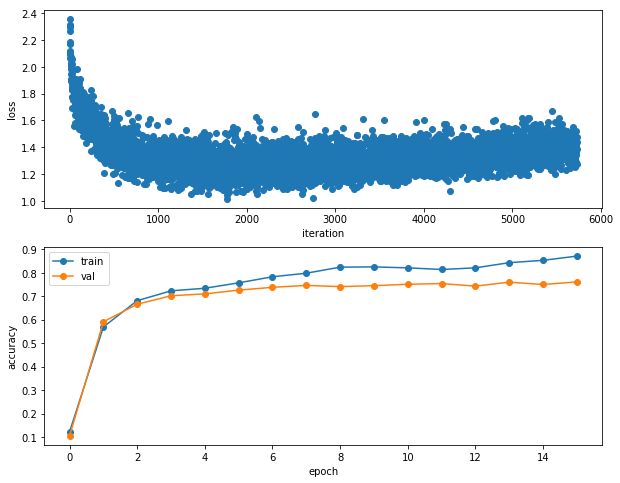

In [10]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [11]:
test_acc = solver.check_accuracy(data['X_test'], data['y_test'])
print 'test acc: %f' % (test_acc)

test acc: 0.765000


In [12]:
import pickle
with open('result_convnet4', 'wb') as f:
    pickle.dump([solver.loss_history, solver.train_acc_history,solver.val_acc_history], f)